<a href="https://www.kaggle.com/code/victorchawsukho/canada-employment-trend?scriptVersionId=155982450" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Data Wrangling

This notebook introduces data cleaning and general EDA. The goal is to prepare the data for ML modeling relating to Canada economic so this is one of my dataset and I'd love to share the cleaning process and preparation prior ML modeling.

## Import libraries and Data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canada-per-capita-income/Canada_per_capita_income.csv
/kaggle/input/deaths-by-marital-status-in-canada/13100711.csv
/kaggle/input/deaths-by-marital-status-in-canada/13100711_MetaData.csv
/kaggle/input/canada-employment-trend-cycle-dataset-official/14100355_MetaData.csv
/kaggle/input/canada-employment-trend-cycle-dataset-official/14100355.csv


In [2]:
pd.set_option('display.max_columns', 200)
df_employment = pd.read_csv("/kaggle/input/canada-employment-trend-cycle-dataset-official/14100355.csv")
# df_employment = pd.read_csv("14100355.csv")  If work on your local machine.
df_employment.head()

/tmp/ipykernel_19/3709903584.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_employment = pd.read_csv("/kaggle/input/canada-employment-trend-cycle-dataset-official/14100355.csv")


,REF_DATE,GEO,DGUID,North American Industry Classification System (NAICS),Statistics,Data type,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1976-01,Canada,2016A000011124,"Total employed, all industries",Estimate,Seasonally adjusted,Persons,249,thousands,3,v2057603,1.1.1.1,9636.7,NaN,NaN,NaN,1
1,1976-01,Canada,2016A000011124,"Total employed, all industries",Estimate,Trend-cycle,Persons,249,thousands,3,v123355106,1.1.1.3,9667.7,NaN,NaN,NaN,1
2,1976-01,Canada,2016A000011124,"Total employed, all industries",Estimate,Unadjusted,Persons,249,thousands,3,v2057812,1.1.1.2,9271.4,NaN,NaN,NaN,1
3,1976-01,Canada,2016A000011124,"Total employed, all industries",Standard error of estimate,Seasonally adjusted,Persons,249,thousands,3,v101893652,1.1.2.1,NaN,..,NaN,NaN,1
4,1976-01,Canada,2016A000011124,"Total employed, all industries",Standard error of month-to-month change,Seasonally adjusted,Persons,249,thousands,3,v101893653,1.1.3.1,NaN,..,NaN,NaN,1


## Data Cleaning

In [3]:
# Rename columns
df_employment = df_employment.rename(columns=lambda x: str(x).replace(' ', '_').replace('North_American_Industry_Classification_System_(NAICS)','Industry'))

In [4]:
# Select columns
df_employment = df_employment.loc[:, ['REF_DATE',
                      'GEO', 
#                       'DGUID', 
                      'Industry',
                      'Statistics',
                      'Data_type',
#        'UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE',
                       'VALUE',]]
#                       'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']]

df_employment.head(20)

,REF_DATE,GEO,Industry,Statistics,Data_type,VALUE
0,1976-01,Canada,"Total employed, all industries",Estimate,Seasonally adjusted,9636.7
1,1976-01,Canada,"Total employed, all industries",Estimate,Trend-cycle,9667.7
2,1976-01,Canada,"Total employed, all industries",Estimate,Unadjusted,9271.4
3,1976-01,Canada,"Total employed, all industries",Standard error of estimate,Seasonally adjusted,NaN
4,1976-01,Canada,"Total employed, all industries",Standard error of month-to-month change,Seasonally adjusted,NaN
5,1976-01,Canada,"Total employed, all industries",Standard error of year-over-year change,Seasonally adjusted,NaN
6,1976-01,Canada,Goods-producing sector,Estimate,Seasonally adjusted,3312.5
7,1976-01,Canada,Goods-producing sector,Estimate,Trend-cycle,3328.0
8,1976-01,Canada,Goods-producing sector,Estimate,Unadjusted,3073.1
9,1976-01,Canada,Goods-producing sector,Standard error of estimate,Seasonally adjusted,NaN


In [5]:
# Convert REF_DATE into date and extract year and month
df_employment['REF_DATE'].dtypes
df_employment['Year'] = pd.to_datetime(df_employment['REF_DATE']).dt.year
df_employment['Month'] = pd.to_datetime(df_employment['REF_DATE']).dt.month
df_employment.head()
# df_employment['REF_DATE'].dtypes

,REF_DATE,GEO,Industry,Statistics,Data_type,VALUE,Year,Month
0,1976-01,Canada,"Total employed, all industries",Estimate,Seasonally adjusted,9636.7,1976,1
1,1976-01,Canada,"Total employed, all industries",Estimate,Trend-cycle,9667.7,1976,1
2,1976-01,Canada,"Total employed, all industries",Estimate,Unadjusted,9271.4,1976,1
3,1976-01,Canada,"Total employed, all industries",Standard error of estimate,Seasonally adjusted,NaN,1976,1
4,1976-01,Canada,"Total employed, all industries",Standard error of month-to-month change,Seasonally adjusted,NaN,1976,1


In [6]:
# Remove symbols and numbers
rename_industry = df_employment['Industry'].replace(to_replace='[^a-zA-Z ]', value='', regex=True).str.strip().str.replace(' ','_')
df_employment['Industry'] = rename_industry

In [7]:
# Split data based on overview and specificity
df_by_geo = df_employment[(df_employment['GEO'] != 'Canada') & \
             (df_employment['Statistics'] == 'Estimate') & \
             (df_employment['Industry'] != 'Total employed, all industries') ]

df_overview = df_employment[(df_employment['GEO'] == 'Canada') & \
             (df_employment['Statistics'] == 'Estimate') & \
             (df_employment['Industry'].str.contains('Total', case=False, na=False)) ]

df_tableau = df_employment[
             (df_employment['Statistics'] == 'Estimate')
             ]

In [8]:
# df_tableau.to_csv('cleaned_canada_emp_trend.csv', index=False)

In [9]:
# Create a function to fill missing values with imputer based on the criterion of missing values exceeding 5%
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

def replace_null_value_imputed(df):
    # Store the mean of the missing values of each column
    missing_proportion = df.isna().mean()

    # Create a list to store column indexes if the column has missing values greater than or equal to 5%
    cols_to_process = missing_proportion[missing_proportion >= 0.05].index

    # If any column has missing values more than 5%, the missing values will be filled with the mean otherwise it will be dropped.
    if not cols_to_process.empty:
        # Check if filling with mean is needed
        if (missing_proportion[cols_to_process] >= 0.05).any():
            # Fill missing values with mean for the selected columns
            df[cols_to_process] = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
        # Drop missing values
        df.dropna(subset=cols_to_process, inplace=True)
    return df

In [10]:
# Apply the handling missing value function
df_by_geo = replace_null_value_imputed(df_by_geo).drop(columns=['REF_DATE', 'Statistics', 'Data_type'])

## EDA

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
# Take a peek at unique values
for u in df_by_geo.columns:
    u_vals = df_by_geo[u].unique()
    print(f"{u}: {u_vals}")

GEO: ['Newfoundland and Labrador' 'Prince Edward Island' 'Nova Scotia'
 'New Brunswick' 'Quebec' 'Ontario' 'Manitoba' 'Saskatchewan' 'Alberta'
 'British Columbia']
Industry: ['Total_employed_all_industries' 'Goodsproducing_sector' 'Agriculture'
 'Forestry_fishing_mining_quarrying_oil_and_gas' 'Utilities'
 'Construction' 'Manufacturing' 'Servicesproducing_sector'
 'Wholesale_and_retail_trade' 'Transportation_and_warehousing'
 'Finance_insurance_real_estate_rental_and_leasing'
 'Professional_scientific_and_technical_services'
 'Business_building_and_other_support_services' 'Educational_services'
 'Health_care_and_social_assistance' 'Information_culture_and_recreation'
 'Accommodation_and_food_services'
 'Other_services_except_public_administration' 'Public_administration']
VALUE: [ 162.4  144.2   52.4 ...  515.2 2243.7  423.1]
Year: [1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006

In [13]:
# Take a look at the industries
from tabulate import tabulate
unique_industries = df_by_geo['Industry'].unique()
df_unique_industries = pd.DataFrame({'Unique_Industries': unique_industries})
print(tabulate(df_unique_industries, headers='keys', tablefmt='pretty'))

+----+--------------------------------------------------+
|    |                Unique_Industries                 |
+----+--------------------------------------------------+
| 0  |          Total_employed_all_industries           |
| 1  |              Goodsproducing_sector               |
| 2  |                   Agriculture                    |
| 3  |  Forestry_fishing_mining_quarrying_oil_and_gas   |
| 4  |                    Utilities                     |
| 5  |                   Construction                   |
| 6  |                  Manufacturing                   |
| 7  |             Servicesproducing_sector             |
| 8  |            Wholesale_and_retail_trade            |
| 9  |          Transportation_and_warehousing          |
| 10 | Finance_insurance_real_estate_rental_and_leasing |
| 11 |  Professional_scientific_and_technical_services  |
| 12 |   Business_building_and_other_support_services   |
| 13 |               Educational_services               |
| 14 |        

In [14]:
df_by_geo.describe()

,VALUE,Year,Month
count,214130.000000,214320.000000,214320.000000
mean,230.958973,1999.000000,6.500000
std,654.414894,13.564692,3.452061
min,0.200000,1976.000000,1.000000
25%,15.900000,1987.000000,3.750000
50%,43.700000,1999.000000,6.500000
75%,168.800000,2011.000000,9.250000
max,7858.700000,2022.000000,12.000000


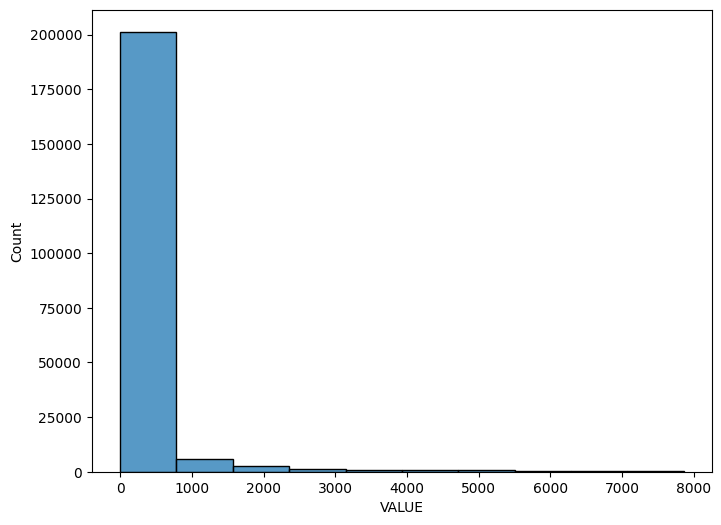

In [15]:
# Plot a histogram
plt.figure(figsize=(8,6))
sns.histplot(df_by_geo['VALUE'], bins=10)
plt.show()

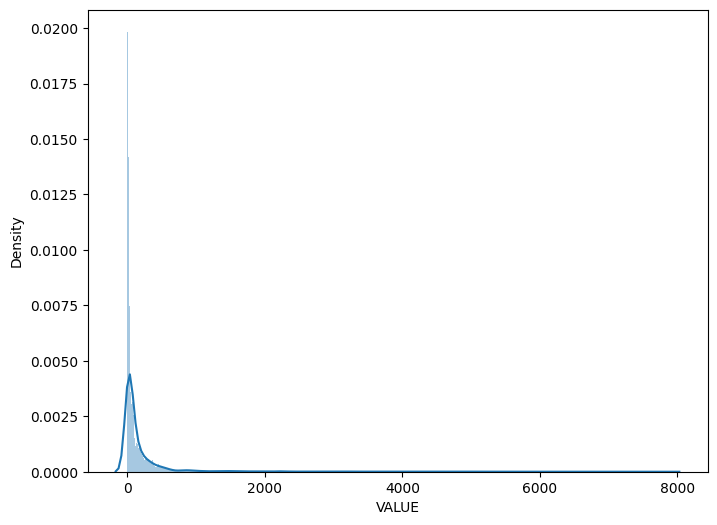

In [16]:
# Plot a density distribution
plt.figure(figsize=(8,6))
sns.histplot(
    df_by_geo['VALUE'], kde=True,
    stat="density", kde_kws=dict(cut=3),
    alpha=.4, edgecolor=(1, 1, 1, .4),
)
plt.show()

In [17]:
# Apply dummies (One-hot encoding) for correlation matrix
df_by_geo = pd.get_dummies(df_by_geo, drop_first=True)

<Axes: >

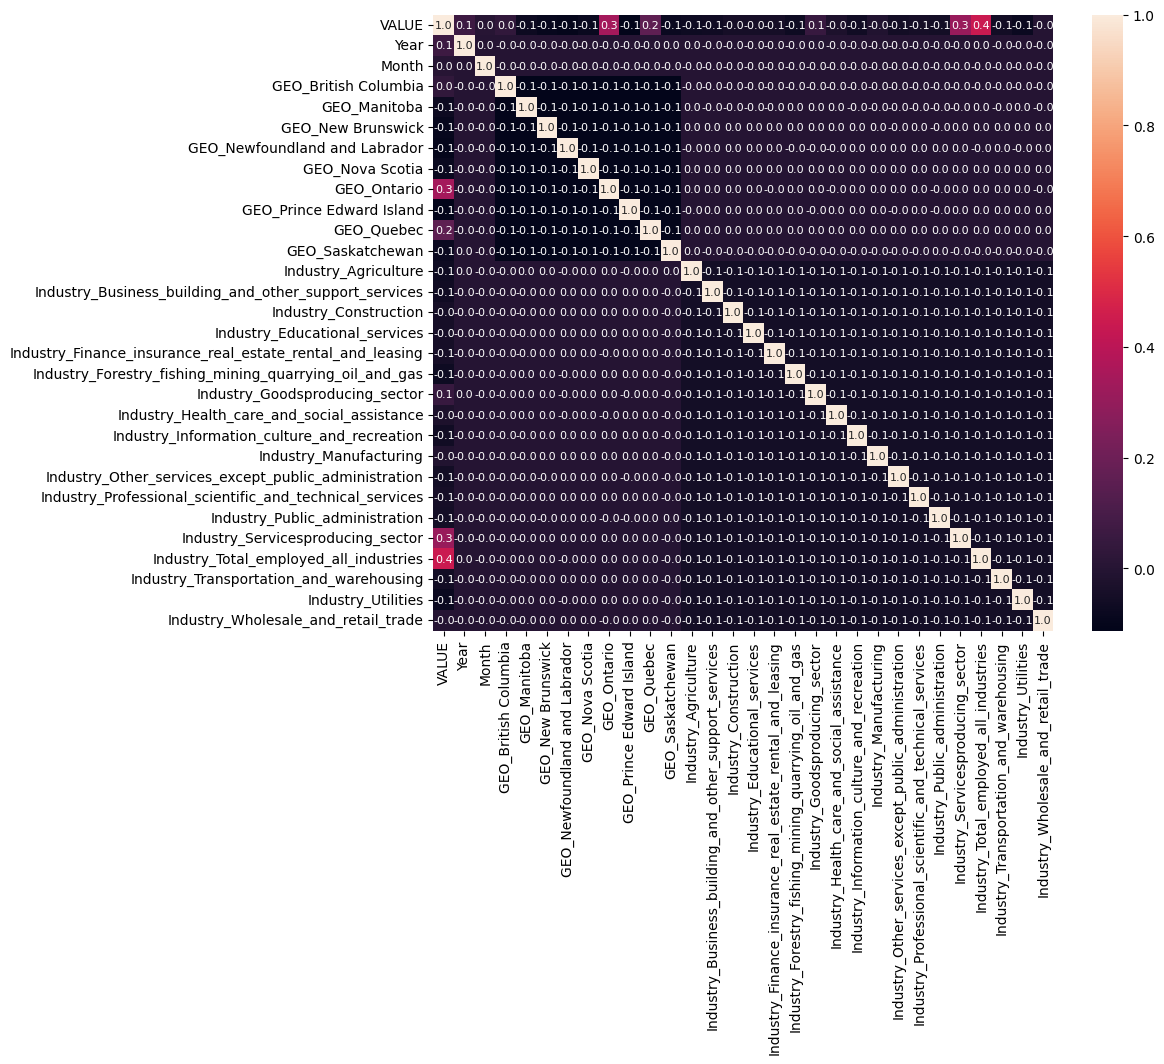

In [18]:
# Plot a correlation matrix
df_corr = df_by_geo.corr()
plt.figure(figsize = (10,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size': 8}, fmt=".1f")

In [19]:
df_by_geo.corr()

,VALUE,Year,Month,GEO_British Columbia,GEO_Manitoba,GEO_New Brunswick,GEO_Newfoundland and Labrador,GEO_Nova Scotia,GEO_Ontario,GEO_Prince Edward Island,GEO_Quebec,GEO_Saskatchewan,Industry_Agriculture,Industry_Business_building_and_other_support_services,Industry_Construction,Industry_Educational_services,Industry_Finance_insurance_real_estate_rental_and_leasing,Industry_Forestry_fishing_mining_quarrying_oil_and_gas,Industry_Goodsproducing_sector,Industry_Health_care_and_social_assistance,Industry_Information_culture_and_recreation,Industry_Manufacturing,Industry_Other_services_except_public_administration,Industry_Professional_scientific_and_technical_services,Industry_Public_administration,Industry_Servicesproducing_sector,Industry_Total_employed_all_industries,Industry_Transportation_and_warehousing,Industry_Utilities,Industry_Wholesale_and_retail_trade
VALUE,1.000000,6.842078e-02,3.184233e-03,3.277853e-02,-7.343064e-02,-9.233021e-02,-1.011858e-01,-8.560650e-02,3.397092e-01,-1.121838e-01,1.576527e-01,-7.867476e-02,-6.962919e-02,-6.571887e-02,-4.859282e-02,-4.744866e-02,-5.025536e-02,-7.211074e-02,5.056525e-02,-2.598482e-02,-6.126448e-02,-1.327953e-02,-5.956240e-02,-5.123662e-02,-5.306114e-02,3.096054e-01,4.433946e-01,-5.627930e-02,-7.793539e-02,-5.123378e-04
Year,0.068421,1.000000e+00,1.353794e-14,-6.295589e-17,-1.563268e-15,-2.431163e-15,-1.373722e-15,-2.339688e-15,-2.851874e-15,-3.029318e-15,-2.514857e-15,1.494158e-15,1.115576e-16,-1.380400e-15,-1.214142e-15,-1.868422e-15,-1.921324e-15,-3.018173e-16,4.466896e-17,-3.139008e-16,-1.283374e-15,-2.988456e-16,-1.035125e-15,-1.181018e-15,-5.108378e-16,-9.937827e-16,1.518635e-16,-8.119402e-16,-3.177656e-16,-6.938101e-16
Month,0.003184,1.353794e-14,1.000000e+00,-3.015642e-17,-4.619702e-17,-5.674837e-17,-2.757736e-17,-6.102213e-17,-6.879633e-17,-6.908245e-17,-4.284364e-17,-1.739266e-17,-1.239287e-17,-4.340832e-17,-4.458907e-17,-4.915147e-17,-6.663294e-17,-1.879797e-17,-1.292445e-17,-1.523656e-17,-3.370625e-17,-1.775297e-17,-2.761969e-17,-4.225041e-17,-1.526848e-18,-4.604267e-17,-2.225925e-17,-4.214188e-17,-1.544455e-17,-3.289780e-17
GEO_British Columbia,0.032779,-6.295589e-17,-3.015642e-17,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-8.979856e-19,-2.404939e-18,-3.075770e-18,-3.145366e-18,-3.513646e-18,-2.063724e-18,-1.280765e-18,-1.737008e-18,-3.120234e-18,-1.989294e-18,-2.615178e-18,-2.682357e-18,-1.214069e-18,-2.824450e-18,-1.253700e-18,-2.805117e-18,-2.681391e-18,-2.345009e-18
GEO_Manitoba,-0.073431,-1.563268e-15,-4.619702e-17,-1.111111e-01,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,7.253239e-19,-2.284233e-19,-1.329096e-19,-3.890626e-19,-2.071275e-18,6.036512e-19,6.394160e-19,1.812404e-19,-4.666939e-19,-4.576923e-19,-3.493106e-19,-7.602429e-19,-1.005280e-19,-2.085472e-19,1.472880e-19,-9.294005e-19,7.505767e-19,-6.686561e-19
GEO_New Brunswick,-0.092330,-2.431163e-15,-5.674837e-17,-1.111111e-01,-1.111111e-01,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,1.432886e-18,2.916157e-19,2.281695e-18,9.970636e-19,2.199231e-18,2.002343e-18,2.400589e-18,6.877467e-19,6.468468e-19,1.885383e-18,-2.565155e-19,1.988811e-18,-8.989522e-19,1.828111e-18,1.241496e-18,1.724925e-18,1.529669e-18,1.433732e-18
GEO_Newfoundland and Labrador,-0.101186,-1.373722e-15,-2.757736e-17,-1.111111e-01,-1.111111e-01,-1.111111e-01,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.564708e-18,9.129077e-19,1.005099e-18,1.979447e-18,2.121418e-18,-1.177277e-18,-1.083032e-18,-9.122431e-21,9.242654e-19,4.154633e-19,1.010113e-18,1.634184e-19,8.892860e-20,6.924590e-19,-5.507290e-19,5.991202e-19,-5.936830e-19,8.790157e-19
GEO_Nova Scotia,-0.085606,-2.339688e-15,-6.102213e-17,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,1.000000e+00,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-0